## SmellTracker Extended Data Figure 1

#### This script contains code to plot Figures 1-a,b,d,e,f from SmellTracker main manuscript (Snitz et al.)
#### Created by Reut Weissgross at Noam Sobel's lab, Human Olfaction Research Group, Weizmann Institute of Science 
#### with help and suggestions by members of the Sobel lab
#### figure 1 c - not in this code

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# figures quality
DPI = 300

In [3]:
# read data table
data = pd.read_csv('SmellTrackerDataAnonymized.csv')
print(data.shape)
#data.head()

(17150, 40)


In [4]:
# making sure we do not have users who are under the age of 18 (keep NAs)
indexAgesBelow18 = data[data['Age']< 18].index
data18NaN = data.drop(indexAgesBelow18)
print(data18NaN.shape) 
print("We lost", data.shape[0] - data18NaN.shape[0], "rows")

(17150, 40)
We lost 0 rows


In [5]:
# change column names
df1 = data18NaN.rename(columns={"HaveYouBeenTestedForCOVID_19": "COVIDtest", 
                          "ShortnessOfBreathOrDifficultyBreathing": "ShortBreath", 
                         "LossOfTheSenseOfSmell": "SmellLoss", 
                         "LossOfTaste": "TasteLoss"})

#df1.head()

In [6]:
# keep only desired columns for figure 1
df2 = df1[['Serial', 'uid', 'Gender', 'Age', 'Country', 'Time', 'COVIDtest', 'Fever', 'Cough', 'ShortBreath', 'Tiredness', 'Aches', 'RunnyNose', 'SoreThroat', 'SmellLoss', 'TasteLoss', 'NoSymptoms']]
#df2.head()

## Descriptives features - 
#### Fig1a - Age and Gender
#### Fig1b - Top 10 countries
#### Fig1c - World map - not in this script
#### Fig1d - COVID19 tests results
#### Fig1e - Symptoms count
#### Fig1f - Submissions per user

In [7]:
# Data by users (not by submission)

# indexing by Serial (submission)
df_users = df2.set_index('Serial')
# drop submissions from same users and keep only the last submission of a user
df_users2 = df_users.drop_duplicates(subset=['uid'], keep='last')
# how many users left? (12020)
df_users2.shape #12020,16

(12020, 16)

Figure 1 a

In [8]:
# ages and genders
# keep only desired columns
df_age = df_users2[['uid', 'Gender', 'Age']]
print(df_age.shape)
#df_age.head()

(12020, 3)


In [9]:
# count how many men and women with and without age (which was not mandatory question)

# how many with age
female_age = df_age['Age'][df_age['Gender'] == 'female'] #7189
male_age = df_age['Age'][df_age['Gender'] == 'male'] #4831
total_withage = len(female_age) + len(male_age) #12020

#how many with and without age (age=NaN)
count_female_noNaN = np.count_nonzero(~np.isnan(female_age)) #6957
count_male_noNaN = np.count_nonzero(~np.isnan(male_age)) #4690
totalN = count_female_noNaN + count_male_noNaN #11647

print('All males:', len(male_age), 'All females:', len(female_age), 'All:', total_withage)
print('Males with age:', count_male_noNaN, 'Females with age:', count_female_noNaN, 'All:', totalN)

All males: 4831 All females: 7189 All: 12020
Males with age: 4690 Females with age: 6957 All: 11647


In [10]:
# make sure there are only males anf females in "gender"
uniqe_gender = df_age['Gender'].unique()
uniqe_gender #male, female - there are no NaNs

array(['female', 'male'], dtype=object)

In [11]:
# calculate % of males and females 

gender_female = df_age['Gender'].str.count('female')
gender_sum_female = gender_female.sum()
gender_sum_female 
# no NaNs in Gender (mandatory question). count 'male' will include 'female'...
num_rows = df_age['Gender'].count()
num_male = int(num_rows) - gender_sum_female
num_male 
percent_females = round((gender_sum_female/num_rows)*100, 1)
percent_males = round((num_male/num_rows)*100, 1)
print("There are", percent_males, "% men and ", percent_females, "% females")
print(f'Females:{gender_sum_female}, males:{num_male}')

There are 40.2 % men and  59.8 % females
Females:7189, males:4831


In [12]:
# calculate mean and std of females and males
mean_age_females = round(np.mean(female_age),2)
std_age_females = round(np.std(female_age, ddof=1),2)
mean_age_males = round(np.mean(male_age),2)
std_age_males = round(np.std(male_age, ddof=1), 2)

print("Females: n={}, mean age={}+-{}; Males: n={}, mean age={}+-{}".format(
    gender_sum_female, 
    mean_age_females,
    std_age_females,
    num_male, 
    mean_age_males, 
    std_age_males))

Females: n=7189, mean age=44.32+-14.28; Males: n=4831, mean age=45.23+-15.29


In [13]:
# values for gender-age figure
bins = range(17,100,5) #histogram bins
df_age['age_binned'] = pd.cut(df_age['Age'], bins)
df_gb = df_age[['age_binned', 'Gender']].groupby(['age_binned', 'Gender'])['age_binned'].count().unstack('Gender').fillna(0)
age_range = [f'{x.left+1} - {x.right}' for x in df_gb.index.values]

C:\Users\reutw.WISMAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


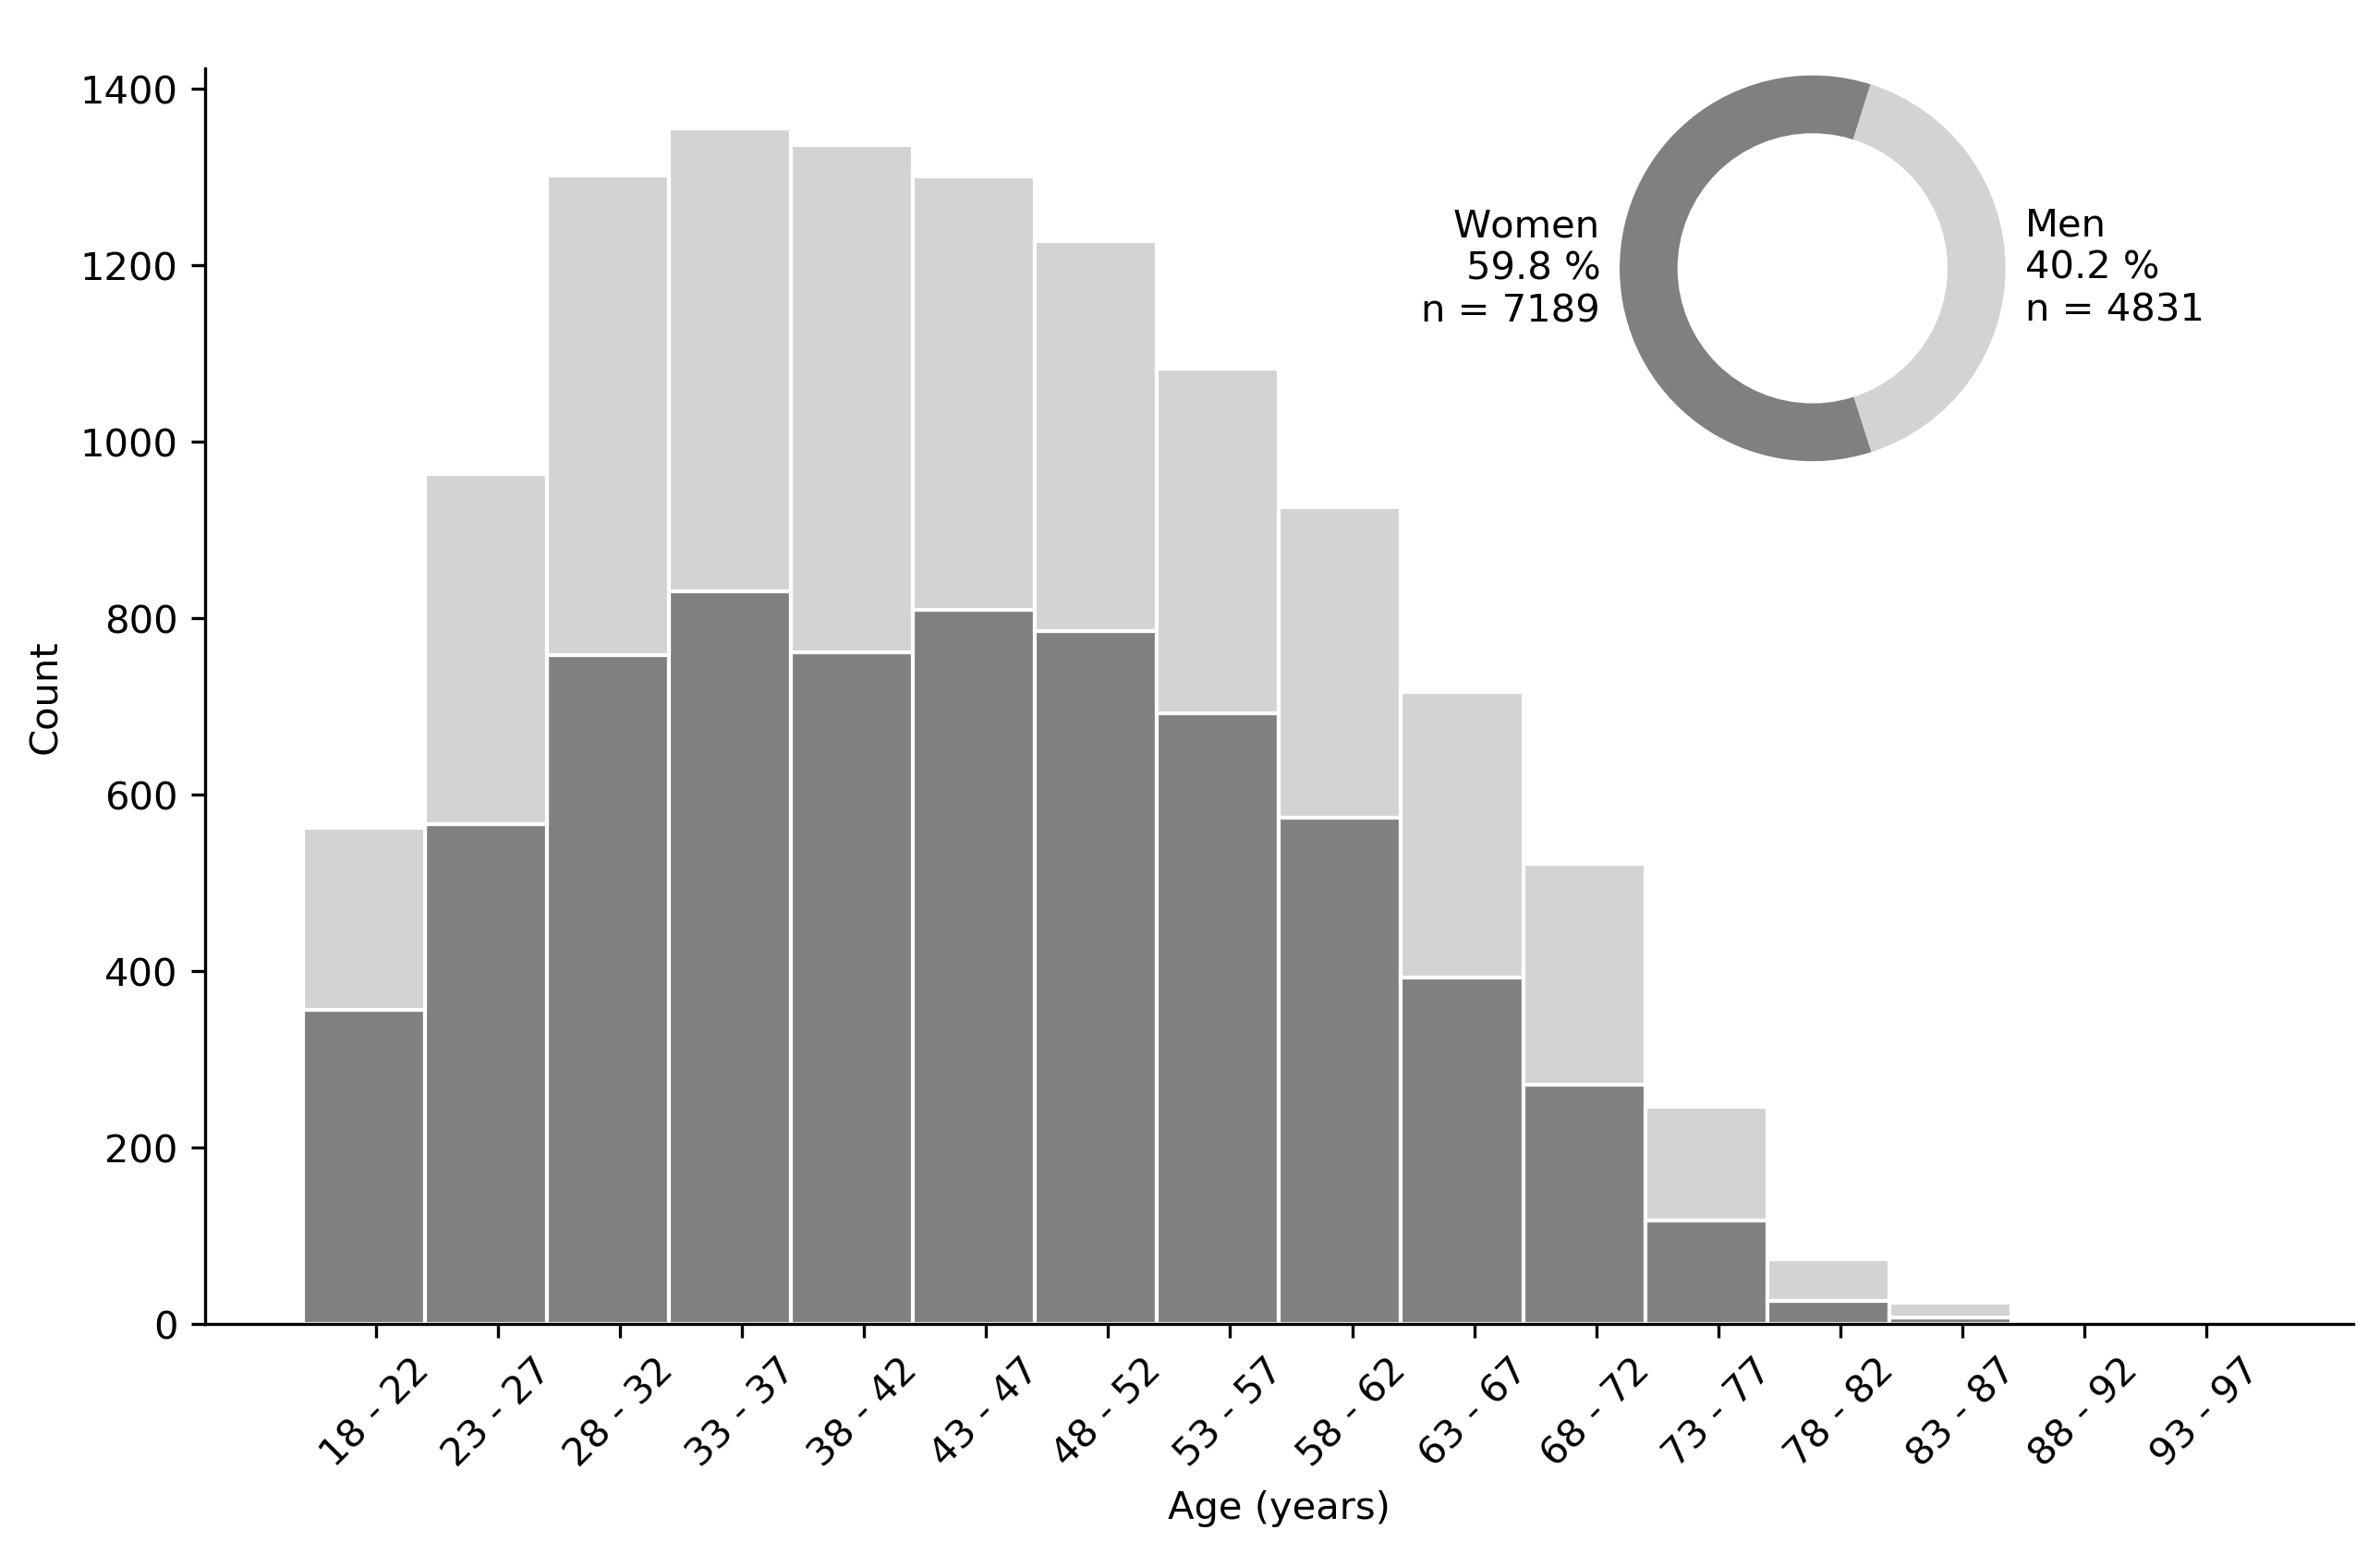

In [14]:
# FIGURE 1 A - Ages and Genders graph

age_bins=range(18,100, 5)
age_bins_plot=np.arange(18+3,100, 5)
color_gender = ['gray', 'lightgray'] #women, men

fig = plt.figure(figsize=[10,6], dpi=DPI)
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.hist(x=[female_age, male_age], bins=age_bins, 
         color=color_gender, ec='white', stacked=True)#, alpha=0.5) 

plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.xticks(age_bins_plot, labels=age_range, rotation=45)
#plt.title('Age distribution')
#plt.text(80,800,f'N={df_users2.shape[0]}')

ax2 = plt.axes([0.605, 0.615, 0.2, 0.29])
gender_label = [f'Women\n{percent_females} %\nn = {gender_sum_female}', 
                f'Men\n{percent_males} %\nn = {num_male}']
per_size = [percent_females, percent_males]

plt.pie(per_size, labels = gender_label, autopct='', colors=color_gender, startangle = 72.5) 
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle) #white circle to creat doughnut

plt.show()

#plt.savefig('Age_and_Gender_dist.pdf')

Figure 1 b

In [15]:
# countries
# copy users data frame and keep only desired columns
df_country = df_users2[['uid', 'Country', 'COVIDtest']]
print(df_country.shape)
#df_country.head()

(12020, 3)


In [16]:
# change countries with long names to short for convenience (USA and UK)
df_country["Country"].replace({"United States of America (USA)": "USA", 
                               "United Kingdom (UK)": "UK"}, inplace=True)
#df_country.head()

C:\Users\reutw.WISMAIN\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
# count how many users per country
country_users = df_country[['uid', 'Country']].groupby(['Country'])['uid'].count()
country_users = country_users.sort_values(inplace=False, ascending=False).reset_index()
country_users #134 countries

Country   uid
0                    Sweden  3747
1                    Israel  2075
2                       USA  1504
3                    Brazil   653
4                  Portugal   589
..                      ...   ...
129               Lithuania     1
130                 Namibia     1
131                 Comoros     1
132  Congo, Republic of the     1
133                  Rwanda     1

[134 rows x 2 columns]

In [18]:
# count how many COVID19 positives, negatives, undetected - per country - all countries

country_tests = df_country[['COVIDtest', 'Country']]
#country_tests #12020 rows=users

In [19]:
all_countries = sorted(list(country_tests['Country'].unique()))
len(all_countries) #134

134

In [20]:
all_tests = list(country_tests['COVIDtest'].unique())
all_tests

['1',
 nan,
 'no',
 '0',
 'Not tested',
 'Tested negative',
 'Tested positive',
 'Results pending']

In [21]:
country_tests['Country'].count()

12020

In [22]:
counts_countries = pd.DataFrame(country_tests.groupby(['Country', 'COVIDtest']).size())
counts_countries
#counts_countries.to_csv('COVID_tests_per_country.csv')

0
Country     COVIDtest          
Afghanistan 1                 1
            Not tested        4
Albania     Not tested        2
Algeria     Not tested        3
            Tested positive   1
...                          ..
Uruguay     Not tested        4
Uzbekistan  Not tested        1
Venezuela   Not tested       10
Yemen       Not tested        1
Zimbabwe    Not tested        2

[240 rows x 1 columns]

In [23]:
#country_users
country_users['uid'].sum() #making sure we are on the right data of 12020 users

12020

In [24]:
# top 10 countries - top 11 and then remove India since it was default (see Methods)

top11 = country_users.head(11)
top11

Country   uid
0        Sweden  3747
1        Israel  2075
2           USA  1504
3        Brazil   653
4      Portugal   589
5         India   473
6        France   455
7     Argentina   247
8            UK   213
9        Canada   185
10  Netherlands   147

In [25]:
# count the "other" by substracting from total

other_count = country_users['uid'].sum() - top11['uid'].sum() #uid=count 

top11 = top11.append( {'Country': 'Other', 'uid':other_count}, ignore_index=True)
top11

Country   uid
0        Sweden  3747
1        Israel  2075
2           USA  1504
3        Brazil   653
4      Portugal   589
5         India   473
6        France   455
7     Argentina   247
8            UK   213
9        Canada   185
10  Netherlands   147
11        Other  1732

In [26]:
#making sure it sums up right
top11['uid'].sum()

12020

In [27]:
#rename col uid to total count
top11 = top11.rename(columns={"uid": "totalCount"})
top11

Country  totalCount
0        Sweden        3747
1        Israel        2075
2           USA        1504
3        Brazil         653
4      Portugal         589
5         India         473
6        France         455
7     Argentina         247
8            UK         213
9        Canada         185
10  Netherlands         147
11        Other        1732

In [28]:
# subtracting India from top 11 (to top 10) and adding it to "others"
India_count = top11[top11['Country'] == 'India']
#India_count['totalCount'] #473
Other_count = top11[top11['Country'] == 'Other']
#Other_count['totalCount'] #1732
new_other = int(India_count['totalCount']) + int(Other_count['totalCount'])
new_other

2205

In [29]:
#copying the table not to making mistakes
top10 = top11.copy()
top10

Country  totalCount
0        Sweden        3747
1        Israel        2075
2           USA        1504
3        Brazil         653
4      Portugal         589
5         India         473
6        France         455
7     Argentina         247
8            UK         213
9        Canada         185
10  Netherlands         147
11        Other        1732

In [30]:
#changing others value to the new one (others+india)
top10['totalCount'][11] = new_other
top10

C:\Users\reutw.WISMAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Country  totalCount
0        Sweden        3747
1        Israel        2075
2           USA        1504
3        Brazil         653
4      Portugal         589
5         India         473
6        France         455
7     Argentina         247
8            UK         213
9        Canada         185
10  Netherlands         147
11        Other        2205

In [31]:
#dropping India's row - notice that India's index (5) will be missing
top10.drop([5], inplace=True)
top10

Country  totalCount
0        Sweden        3747
1        Israel        2075
2           USA        1504
3        Brazil         653
4      Portugal         589
6        France         455
7     Argentina         247
8            UK         213
9        Canada         185
10  Netherlands         147
11        Other        2205

In [32]:
top10['totalCount'].sum()

12020

In [33]:
# count number of positive and negative COVID19 users per country
negatives = []
positives = []
for country in top10['Country']:
    temp_df = df_country[df_country['Country'] == country]
    temp_tests = temp_df['COVIDtest'].value_counts().to_dict() #gives the number of each value: Not tested, pos, neg, pending, 1, 0, no
    #print(temp_tests)
    temp_pos = temp_tests.get('Tested positive')
    temp_neg = temp_tests.get('Tested negative')
    #print(temp_pos, temp_neg)
    positives.append(temp_pos)
    negatives.append(temp_neg)
    #print(positives, negatives) #NOTICE! "other" is none 
    
negatives, positives

([65, 33, 86, 30, 57, 10, 1, 4, 4, 3, None],
 [79, 13, 94, 18, 12, 32, 3, 14, 6, 8, None])

In [34]:
# calculating total pos and neg from the entire data in order to calculate "other" pos and neg

total_neg = df_country['COVIDtest'].str.contains('Tested negative').value_counts() 
total_neg = total_neg[1]
total_pos = df_country['COVIDtest'].str.contains('Tested positive').value_counts() 
total_pos = total_pos[1]
total_neg, total_pos

(400, 348)

In [35]:
# calculate value for "other" = total neg/pos minus sum negs and poss

top10negs = sum(negatives[0:10]) #without none
top10poss = sum(positives[0:10]) #without none
other_neg = total_neg-top10negs
other_pos = total_pos-top10poss

print(other_neg, other_pos)

107 69


In [36]:
# adding the "other" values to the list

negatives[10] = other_neg
positives[10] = other_pos

print(negatives, positives)

[65, 33, 86, 30, 57, 10, 1, 4, 4, 3, 107] [79, 13, 94, 18, 12, 32, 3, 14, 6, 8, 69]


In [37]:
# add negatives and positives as cols to top10 DF
top10['Negatives'] = negatives
top10['Positives'] = positives
top10

Country  totalCount  Negatives  Positives
0        Sweden        3747         65         79
1        Israel        2075         33         13
2           USA        1504         86         94
3        Brazil         653         30         18
4      Portugal         589         57         12
6        France         455         10         32
7     Argentina         247          1          3
8            UK         213          4         14
9        Canada         185          4          6
10  Netherlands         147          3          8
11        Other        2205        107         69

In [38]:
# adding an "Undetected" column which is the residual of total-negs-pos
top10['Undetected'] = top10['totalCount'] - top10['Negatives'] - top10['Positives']
top10

Country  totalCount  Negatives  Positives  Undetected
0        Sweden        3747         65         79        3603
1        Israel        2075         33         13        2029
2           USA        1504         86         94        1324
3        Brazil         653         30         18         605
4      Portugal         589         57         12         520
6        France         455         10         32         413
7     Argentina         247          1          3         243
8            UK         213          4         14         195
9        Canada         185          4          6         175
10  Netherlands         147          3          8         136
11        Other        2205        107         69        2029

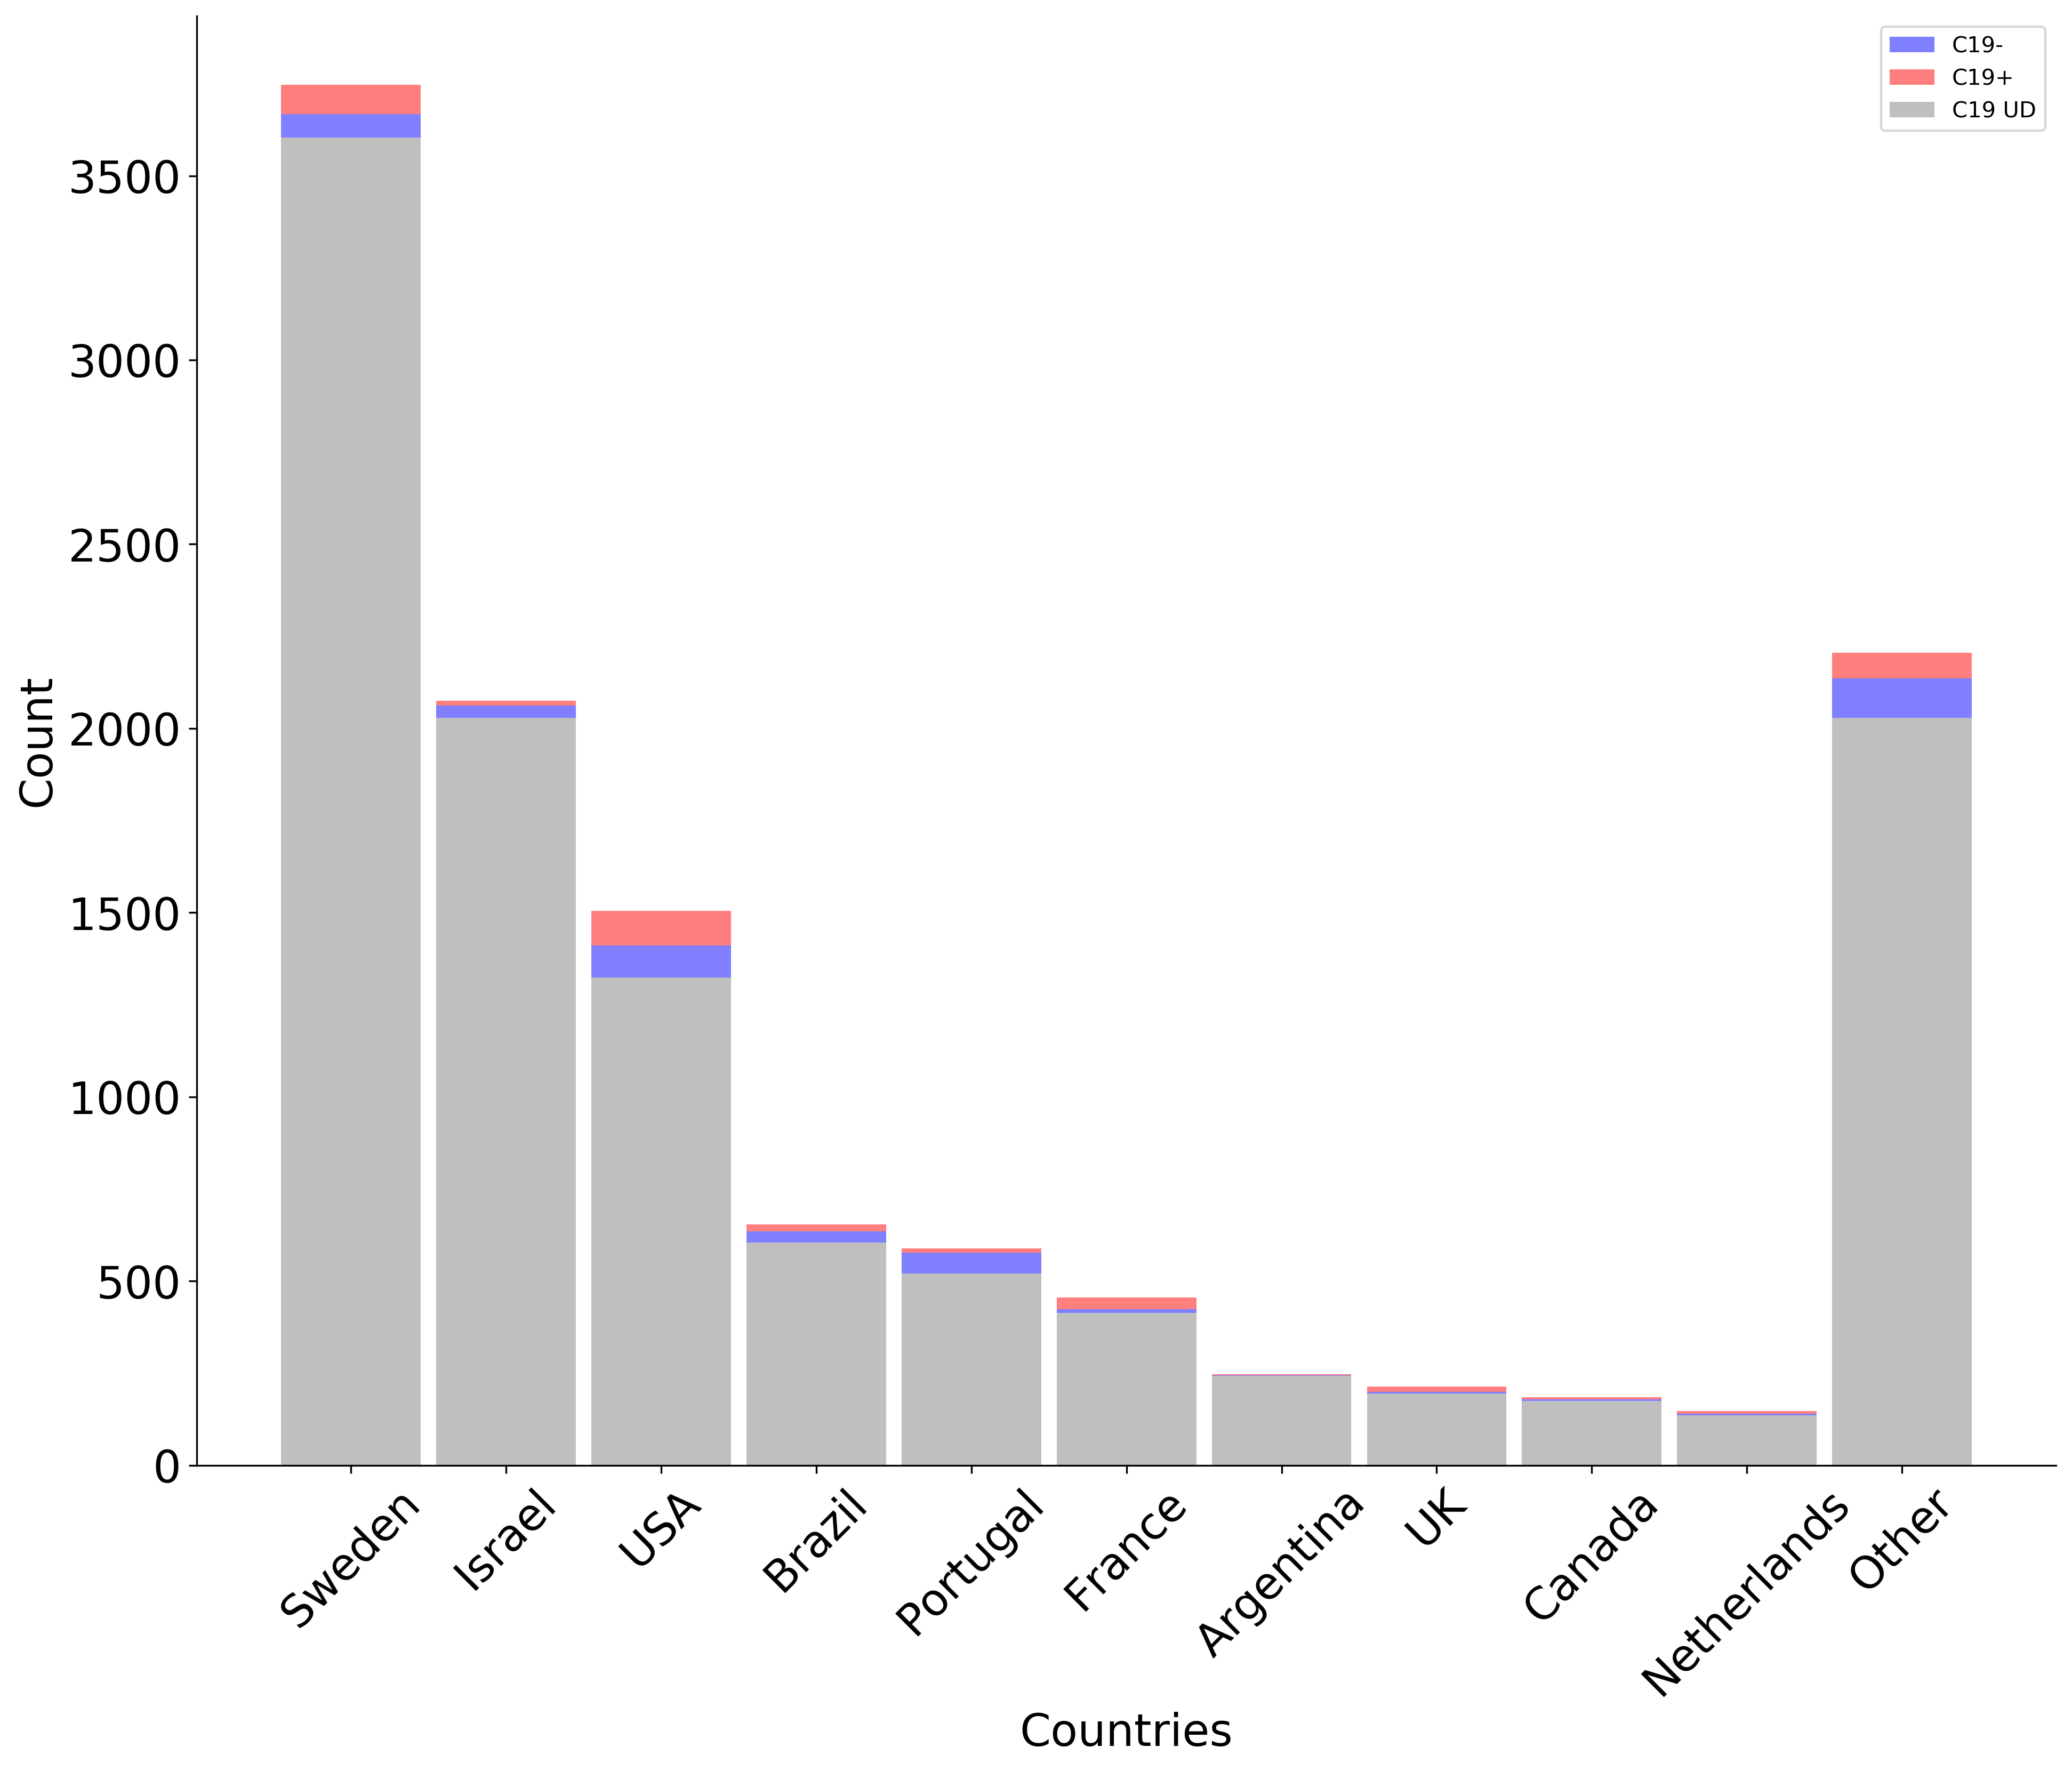

In [39]:
# FIGURE 1-B - top 10 countries, legend by COVID19 test result
# plot a stacked bar graph (undetected, neg, pos)

label_country = list(top10['Country']) #x axis
label_pos = np.array(top10['Positives']) #y axis pos
label_neg = np.array(top10['Negatives']) #y axis neg
label_res = np.array(top10['Undetected']) #y axis UD (not pos not neg)

#bar width
width = 0.9

fig = plt.figure(figsize=[15,12], dpi=DPI)
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

p1 = plt.bar(label_country, label_res, width, label = 'Undetected', color='gray', alpha=0.5)
p2 = plt.bar(label_country, label_neg, width, label = 'Negatives', color='blue', alpha=0.5, bottom=label_res)
p3 = plt.bar(label_country, label_pos, width, label = 'Positives', color='red', alpha=0.5, bottom=label_res+label_neg)

plt.ylabel('Count', fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.xticks(np.arange(0, 11)-0, labels=label_country, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend((p2[0], p3[0], p1[0]), ('C19-', 'C19+', 'C19 UD'))
plt.show()

#plt.title('Country of Residence - top 10 countries count')

#plt.savefig('Top10CountriesBar.pdf')

Figure 1 c

In [40]:
#FIGURE - 1- C - world map - 
# in a separate code by OferPerl

Figure 1 d

In [41]:
# Diagnosis - NOTICE! IT IS PER USER (last user's submission), NOT PER SUBMISSION
# copy data table, keep only desired columns
df_diag = df_users2[['uid', 'COVIDtest']]
#df_diag.head()

In [42]:
# what are the unique values in COVIDtest col

unique_diagnosis = df_diag['COVIDtest'].unique()
unique_diagnosis #'1', nan, 'no', '0', 'Not tested', 'Results pending','Tested negative', 'Tested positive'

array(['1', nan, 'no', '0', 'Not tested', 'Tested negative',
       'Tested positive', 'Results pending'], dtype=object)

In [43]:
# calculating how many users per COVID19 test result, keeping only relevant values

test_dict = df_diag['COVIDtest'].value_counts(dropna=False).to_dict()
test_dict

{'Not tested': 9061,
 nan: 1907,
 'Tested negative': 400,
 'Tested positive': 348,
 'Results pending': 260,
 '1': 35,
 'no': 8,
 '0': 1}

In [44]:
#for the figure we need - positives, negatives, pending, not tested/na (which includes eveything else)
positives = test_dict['Tested positive']
negatives = test_dict['Tested negative']
pending = test_dict['Results pending']
not_tested = int(test_dict['Not tested']) + int(test_dict['1'] + int(test_dict['no']) + int(test_dict['0'])) + 1907 #the last is NAs
total = int(positives) + int(negatives) + int(not_tested) + int(pending)
print("not tested or NA = {}\npending = {}\nnegative = {}\npositive = {}\ntotal = {}".format(not_tested, 
                                                                                       pending, 
                                                                                       negatives, 
                                                                                       positives, total))

not tested or NA = 11012
pending = 260
negative = 400
positive = 348
total = 12020


In [45]:
#great, now I will calculate the %

per_positive = round((positives/total)*100,1)
per_negative = round((negatives/total)*100,1)
per_pending = round((pending/total)*100,1)
per_notTested = round((not_tested/total)*100,1)
print("not tested or NA = {}\npending = {}\nnegative = {}\npositive = {}".format(per_notTested, 
                                                                          per_pending, 
                                                                          per_negative, 
                                                                          per_positive))

not tested or NA = 91.6
pending = 2.2
negative = 3.3
positive = 2.9


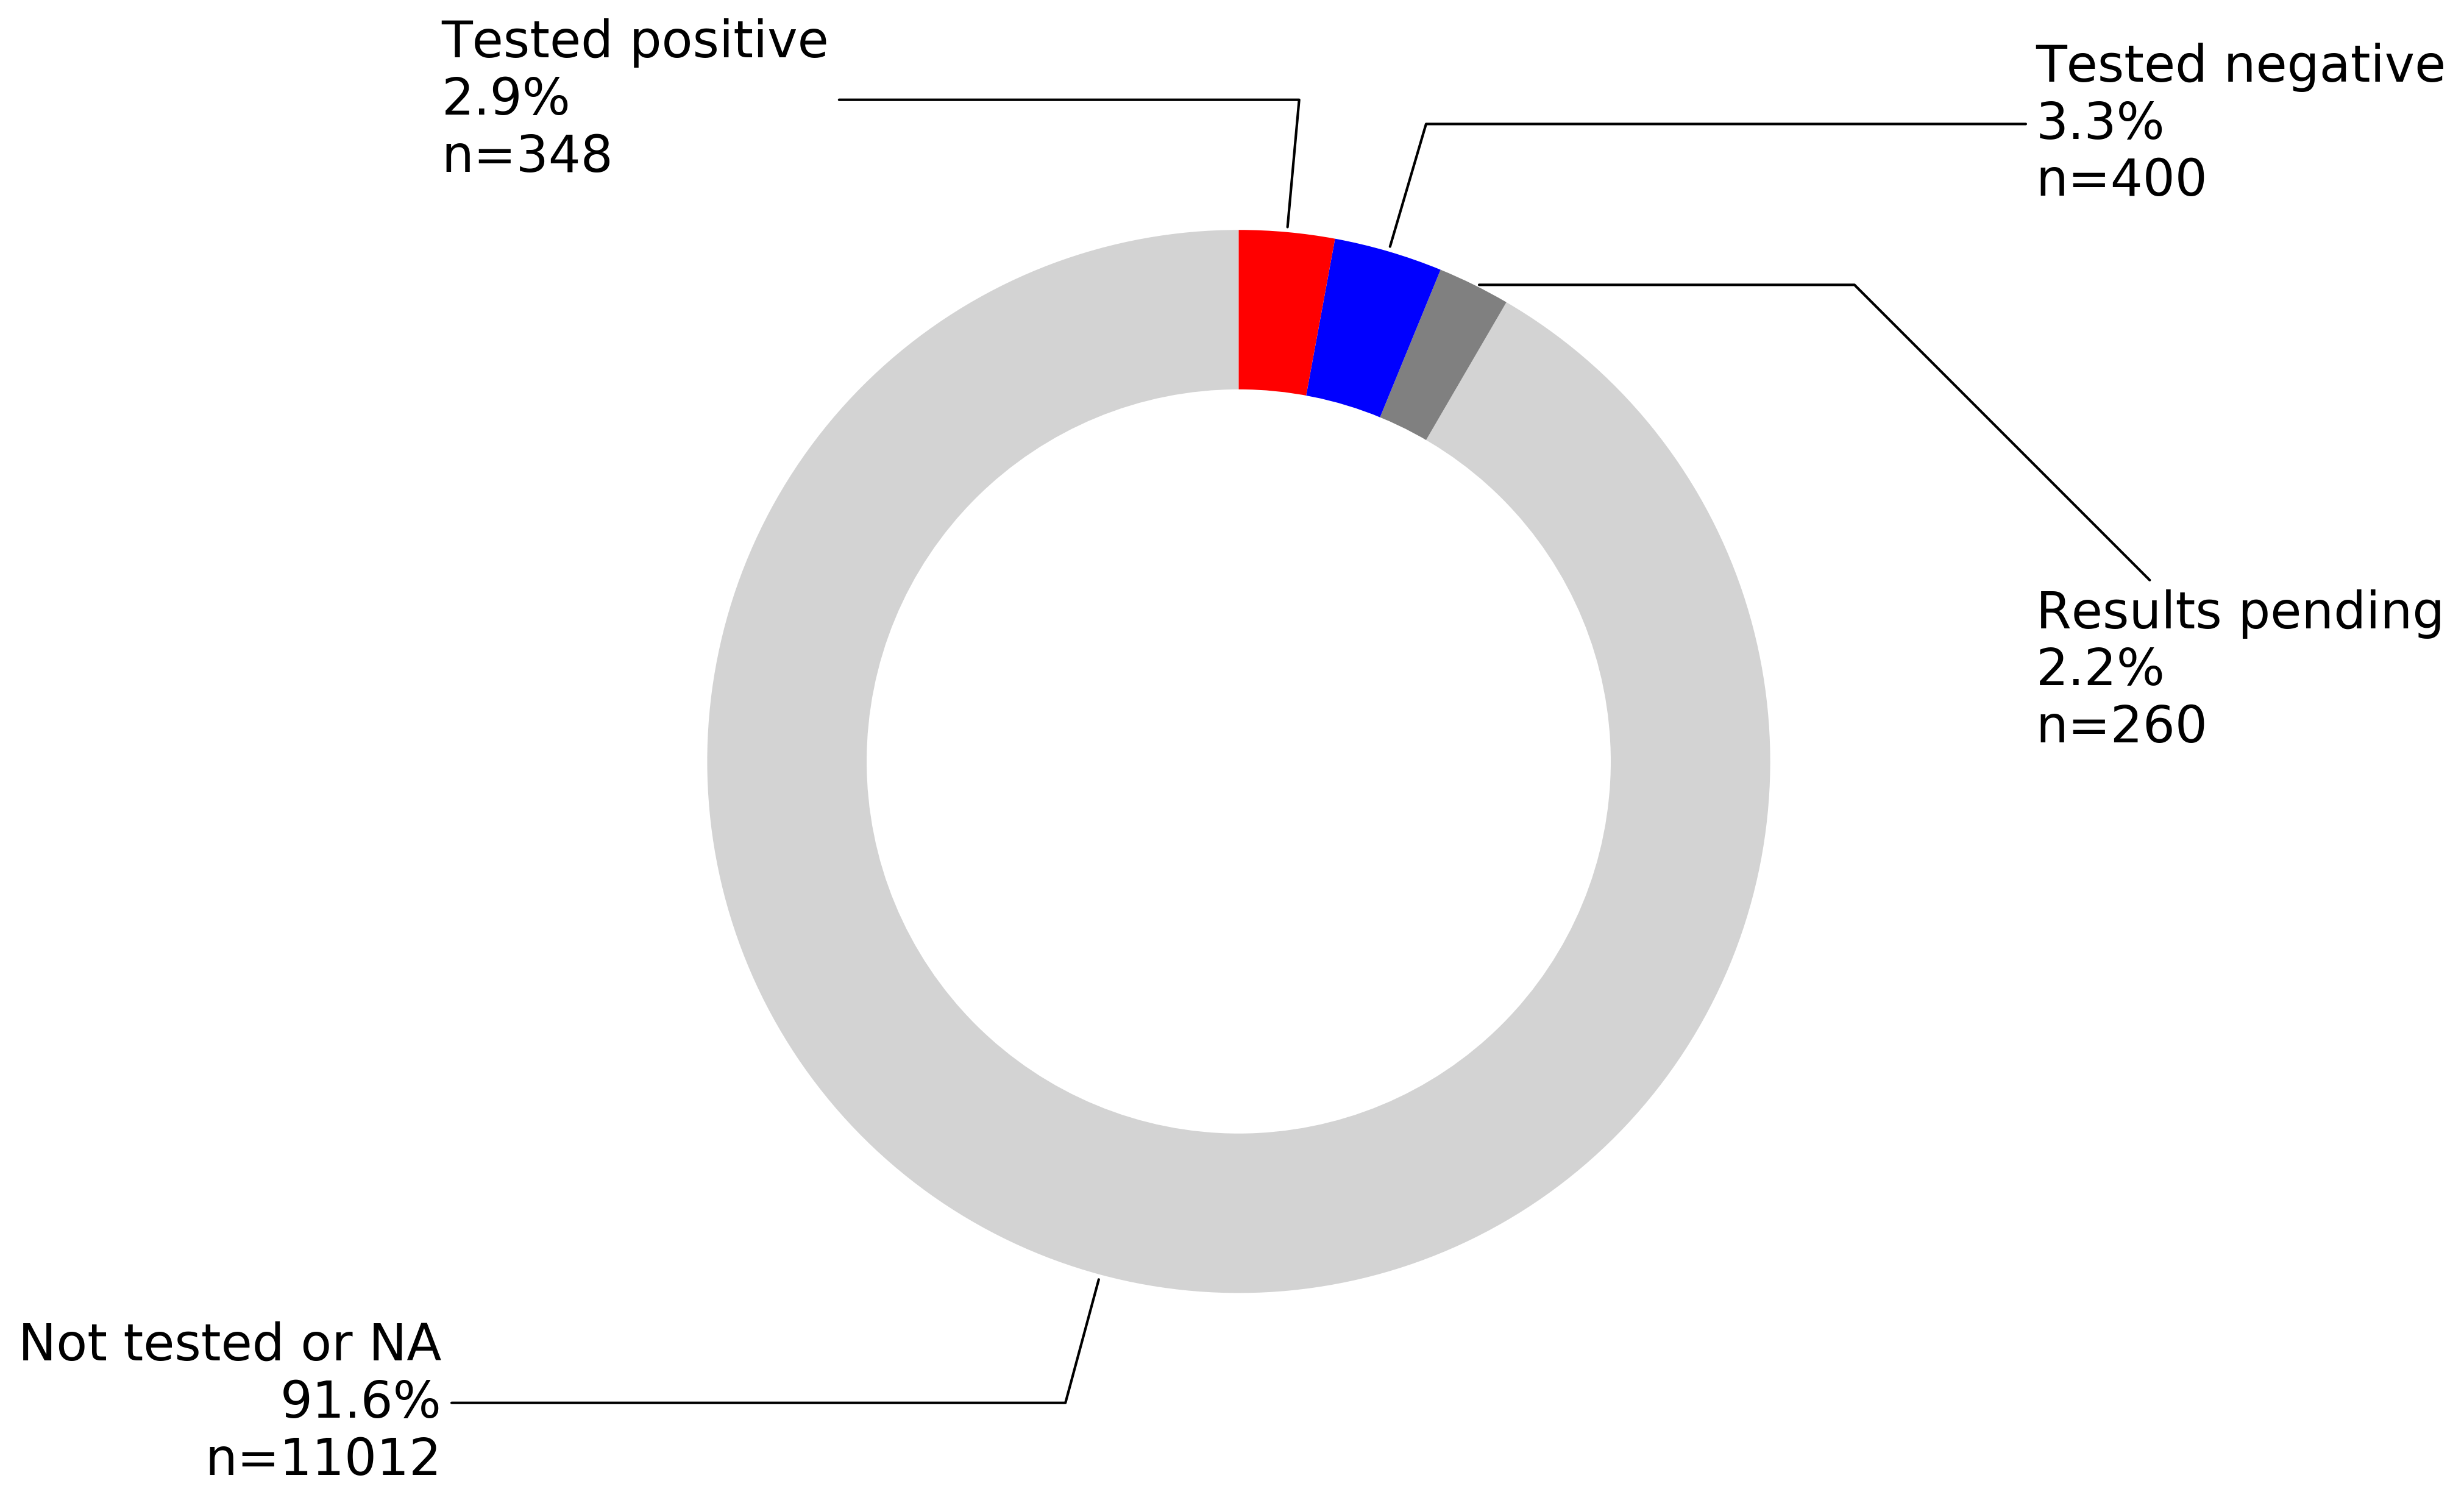

In [46]:
#FIGURE 1- D- COVID19 test results doughnut graph

#colors
diag_color = ['lightgray', 'gray', 'blue', 'red'] #order is: not tested, pending, neg, pos

#data
diag_data = [per_notTested, per_pending, per_negative, per_positive]
diag_labels = ['Not tested or NA\n'+str(per_notTested)+'%\nn='+str(not_tested), 
               'Results pending\n'+str(per_pending)+'%\nn='+str(pending),
               'Tested negative\n'+str(per_negative)+'%\nn='+str(negatives), 
               'Tested positive\n'+str(per_positive)+'%\nn='+str(positives)]

#technical
fig = plt.figure(figsize=[13.75,8.5], dpi=DPI)
ax = plt.axes()

wedges, texts = ax.pie(diag_data, colors=diag_color, startangle = 90, wedgeprops=dict(width=0.5))#, alpha=0.5) 
kw = dict(arrowprops=dict(arrowstyle="-"),
         zorder=0, va="center") 

#arms
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    x_text = 0
    y_text = y
    angA = 0
    armA = 30
    armB = 30
    if i == 1:
        x = x
        x_text =  + 0
        y_text = y_text - .76
        angA = -45
        ang = 0
        
        armA = 45
        armB = 45
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA={},angleB={}".format(
        angA, ang)

    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(diag_labels[i], xy=(x, y), xytext=(1.5*np.sign(x-.2)+x_text, 1.25*y_text),
                horizontalalignment=horizontalalignment, fontsize=20, **kw)

#make it doughnut and not pie (a whole in the middle)    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.box(on=False)
#plt.title('COVID-19 test')
plt.show()

#fig.savefig('COVIDTests_pie.pdf')

Figure 1 e

In [47]:
# symptoms count
# copy data frame
df_symp = df_users2.copy()
#df_symp.head()

In [48]:
# take only the symptoms cols
sympData = df_symp[['Fever',
                       'Cough',
                       'ShortBreath',
                       'Tiredness',
                       'Aches',
                       'RunnyNose',
                       'SoreThroat',
                       'SmellLoss',
                       'TasteLoss',
                       'NoSymptoms']]

#sympData.head()

In [49]:
#change col names
sympData.columns =     ['Fever',
                       'Cough',
                       'Breath',
                       'Tiredness',
                       'Aches',
                       'Runny Nose',
                       'Sore Throat',
                       'Smell Loss',
                       'Taste Loss',
                       'No Symptoms']

#sympData.head()

In [50]:
# replace NaN with 0, and X with 1
sympData = sympData.replace({np.nan : 0, 'X' : 1})
#sympData

In [51]:
# adding a sum column for "how many symptoms a user reported" (marked)
sympData['CountSymp'] = sympData['Fever'] + sympData['Cough'] + sympData['Breath'] + sympData['Tiredness'] + sympData['Aches'] + sympData['Runny Nose'] + sympData['Sore Throat'] + sympData['Smell Loss'] + sympData['Taste Loss']
#sympData.head()

In [52]:
number_of_symptoms = list(sympData['CountSymp'])
number_of_symptoms

[1,
 0,
 0,
 4,
 1,
 0,
 5,
 1,
 0,
 0,
 0,
 4,
 2,
 4,
 0,
 0,
 0,
 5,
 3,
 0,
 2,
 1,
 1,
 1,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 4,
 0,
 0,
 1,
 1,
 2,
 0,
 4,
 0,
 0,
 0,
 2,
 1,
 0,
 5,
 0,
 4,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 5,
 1,
 0,
 0,
 2,
 0,
 0,
 4,
 2,
 0,
 3,
 6,
 4,
 1,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 4,
 6,
 7,
 2,
 0,
 0,
 0,
 4,
 1,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 7,
 0,
 3,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 0,
 7,
 2,
 2,
 4,
 1,
 4,
 0,
 5,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 5,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 4,
 0,
 2,
 0,
 0,
 1,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 8,
 0,
 2,
 3,
 0,
 1,
 4,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 5,
 5,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 1,
 0,
 4,
 2,
 3,
 7,
 8,
 3,
 2,
 0,
 1,
 2,
 3,
 1,
 1,
 1,
 8,
 2,
 1,
 1,
 1,
 0,
 0,
 5,
 0,
 8,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 6,
 6,
 8,
 3,
 0,
 0,
 0,
 1,
 0,
 1,
 6,


In [53]:
# look at the actual numbers
pd.Series(number_of_symptoms).value_counts()

0    5279
2    1941
1    1917
3    1187
4     754
5     483
6     246
7     130
8      60
9      23
dtype: int64

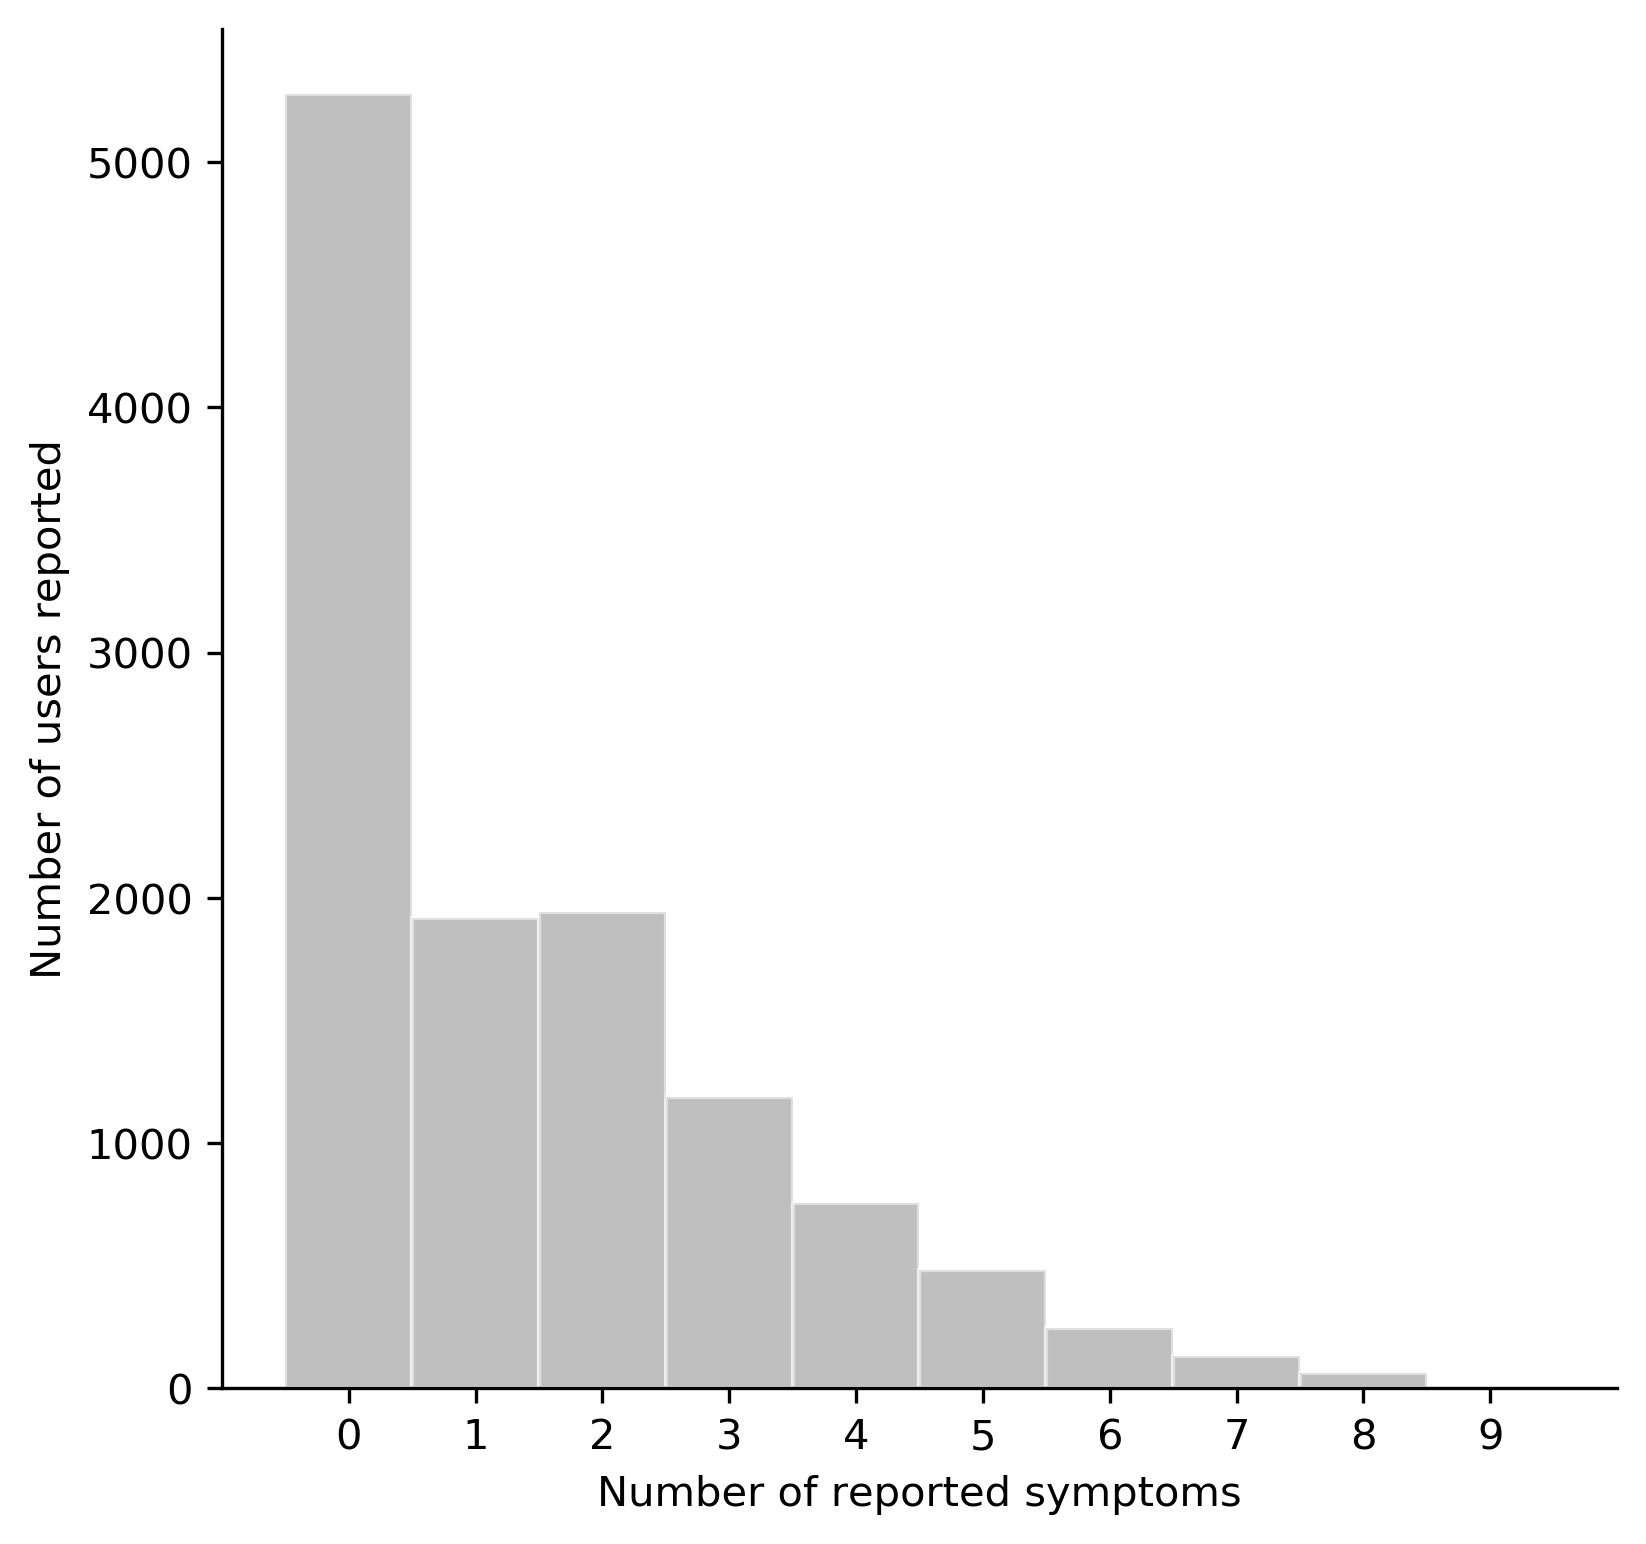

In [54]:
#FIGURE 1 - E - number of symptoms reported per user (last submission)
# plotting a histogram of the symptoms count
fig = plt.figure(figsize=[6,6], dpi=DPI) #[x,y]
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#to set the x ticks align with the bins
bins = np.arange(10)-0.5

plt.hist(x=number_of_symptoms, bins=bins,
         color='gray', alpha=0.5, ec='white')

plt.ylabel('Number of users reported')
plt.xlabel('Number of reported symptoms')
plt.xticks(range(10))
plt.xlim([-1,10])

plt.show()
#plt.savefig('number of symptoms reported.pdf')

Figure 1 f

In [55]:
# Counting how many submissions we got per user 
# copy data frame - we need original table and not the table per last submission of user
df_returning_users = df_users.copy()
#df_returning_users

In [56]:
# keep only the columns we need
df_submissions = df_returning_users[['uid', 'Gender', 'Age', 'Country']]
#df_submissions

In [57]:
# change to USA and UK
df_submissions["Country"].replace({"United States of America (USA)": "USA", 
                               "United Kingdom (UK)": "UK"}, inplace=True)
#df_submissions

C:\Users\reutw.WISMAIN\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
# count submissions per user

df_counts = df_submissions['uid'].value_counts().rename_axis('user').reset_index(name='submissions')

#df_counts
#df_counts.to_csv('count_submissions.csv')  

In [59]:
# number of submissions as a list
number_of_submissions = list(df_counts['submissions'])
number_of_submissions

[127,
 94,
 90,
 84,
 48,
 47,
 45,
 38,
 37,
 37,
 30,
 29,
 24,
 23,
 22,
 22,
 22,
 21,
 20,
 20,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


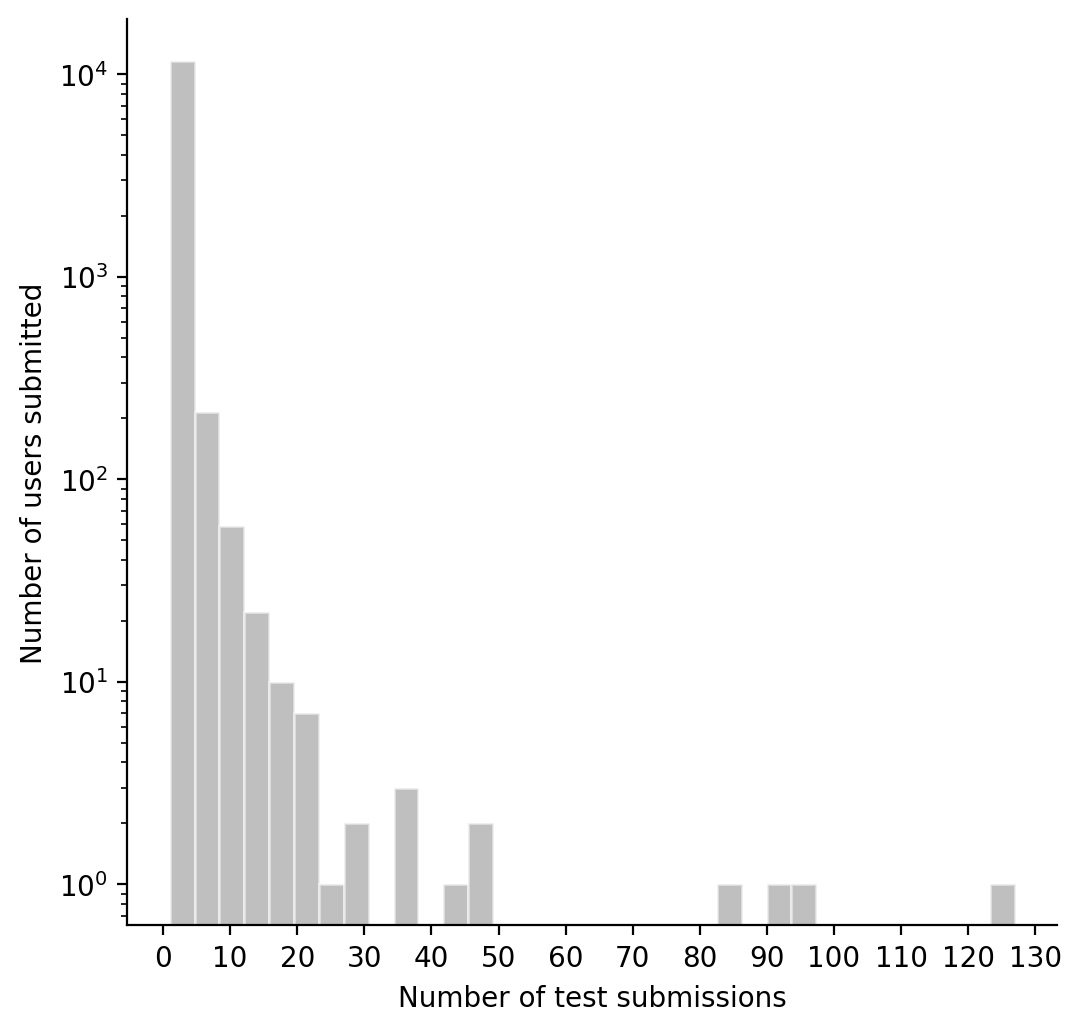

In [60]:
#FIGURE 1-F - number of submissions per user

fig = plt.figure(figsize=[6,6], dpi=200) #[x,y]
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#plot the graph
plt.hist(x=number_of_submissions, bins=34, 
         color='gray', alpha=0.5, ec='white')
plt.semilogy() #to make the y axis in log
plt.ylabel('Number of users submitted')
plt.xlabel('Number of test submissions')
plt.xticks(list(range(0,131,10)))

plt.show()
#plt.savefig('number of submissions per user.pdf')